# ISYS 812 Project: Group 5

### By Amogh Ranganathaiah, Anthony Fang, Ekta Singh, Mahak Kataria

The subject of analyzing housing prices, along with the accompanying dataset, is indeed intriguing and presents a valuable opportunity for comprehensive analysis. This dataset encompasses a myriad of diverse factors that exert influence on property valuations. <br>

The insights derived from such an analysis can significantly aid in our capacity to assess the worth of properties in future contexts. <br>

[The dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices) in question pertains to residential properties situated within a specific California district and contains comprehensive summary statistics derived from the 1990 census data. This dataset provides insights into the valuation of various houses in California, and we are going to consider and compare the following factors to conclude the results:
1. Longitude: A measure of how far west a house is; a higher value is farther west.
2. Latitude: A measure of how far north a house is; a higher value is farther north.
3. Housing Median Age: Median age of a house within a block; a lower number represents a newer building.
4. Total Rooms: Total number of rooms within a block.
5. Total Bedrooms: Total number of bedrooms within a block.
6. Population: Total number of people residing within a block.
7. Households: Total number of households, a group of people residing within a home unit, for a block.
8. Median Income: Median income for households within a block of houses (measured in tens of thousands of US Dollars).
9. Median House Value: Median house value for households within a block (measured in US Dollars).
10. Ocean Proximity: Location of the house with respect to the ocean/sea.

Number of Columns: **10** <br>
Number of Rows: **20640**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("housing.csv")
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [2]:
data.shape

(20640, 10)

In [3]:
# Checking all rows which have no value present
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
# Deleting all rows which have no value present
data = data.dropna()

data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data["ocean_proximity"] = data["ocean_proximity"].astype('category')
data["ocean_proximity_cat"] = data["ocean_proximity"].cat.codes
data = data.drop('ocean_proximity', axis=1)

# <1H OCEAN = 0
# INLAND = 1
# ISLAND = 2
# NEAR BAY = 3
# NEAR OCEAN = 4

In [6]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_cat
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,1.166153
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,1.420135
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,1.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


In [8]:
data.shape

(20433, 10)

## Question

Are there any outliers in the dataset? <br> <br>
The interquartile range (IQR) is a measure of statistical dispersion, or the spread of data. It is defined as the difference between the 75th and 25th percentile of the data.

In [9]:
# Drop the first row (string labels)
data = data.iloc[1:]

# Define the numerical columns for outlier detection
numerical_cols = data.columns.difference(['ocean_proximity'])

# Calculate the IQR for each numerical feature
Q1 = data[numerical_cols].quantile(0.15)
Q3 = data[numerical_cols].quantile(0.85)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 2.25

# Find outliers using the IQR method
outliers = ((data[numerical_cols] < (Q1 - threshold * IQR)) | (data[numerical_cols] > (Q3 + threshold * IQR))).any(axis=1)

# Display the rows containing outliers
data[outliers]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_cat
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,3
283,-122.16,37.79,22.0,12842.0,2048.0,4985.0,1967.0,5.9849,371000.0,3
508,-122.30,37.84,14.0,7355.0,2408.0,3100.0,2051.0,4.0018,143800.0,3
511,-122.22,37.82,42.0,2991.0,335.0,1018.0,335.0,13.4990,500001.0,3
570,-122.24,37.72,5.0,18634.0,2885.0,7427.0,2718.0,7.6110,350700.0,3
...,...,...,...,...,...,...,...,...,...,...
20529,-121.78,38.55,12.0,10509.0,2186.0,5633.0,2138.0,2.9605,204300.0,1
20530,-121.76,38.57,11.0,15018.0,3008.0,7984.0,2962.0,3.1371,201800.0,1
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,1
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,1


In [10]:
import warnings
warnings.filterwarnings('ignore')

data = data.drop(data[outliers].index)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_cat
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3


In [11]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_cat
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-119.582252,35.644474,28.874100,2451.824500,503.868150,1336.133300,469.252750,3.819916,205518.888300,1.168350
std,2.003108,2.140581,12.467009,1547.584573,313.025764,825.565517,287.003728,1.786355,114429.525295,1.422009
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,19.000000,1438.750000,294.000000,782.000000,278.000000,2.555600,118800.000000,0.000000
50%,-118.510000,34.260000,29.000000,2101.000000,430.000000,1155.000000,405.000000,3.519200,178900.000000,1.000000
75%,-118.010000,37.720000,37.000000,3069.000000,632.000000,1686.000000,590.000000,4.708300,263125.000000,1.000000
max,-114.310000,41.950000,52.000000,10223.000000,2098.000000,5561.000000,1939.000000,13.173800,500001.000000,4.000000


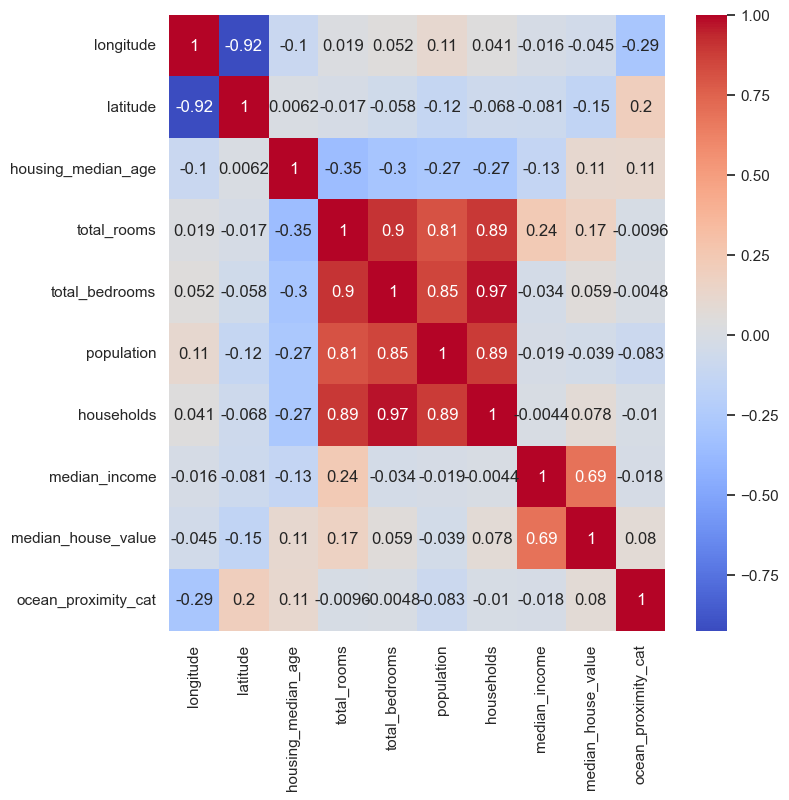

In [12]:
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)

# RED = good predictor, 

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data.loc[ : , data.columns != 'ocean_proximity'].corr(), annot=True, cmap='coolwarm');

## Question

How do house prices differ when a person moves closer to the bay from inland?

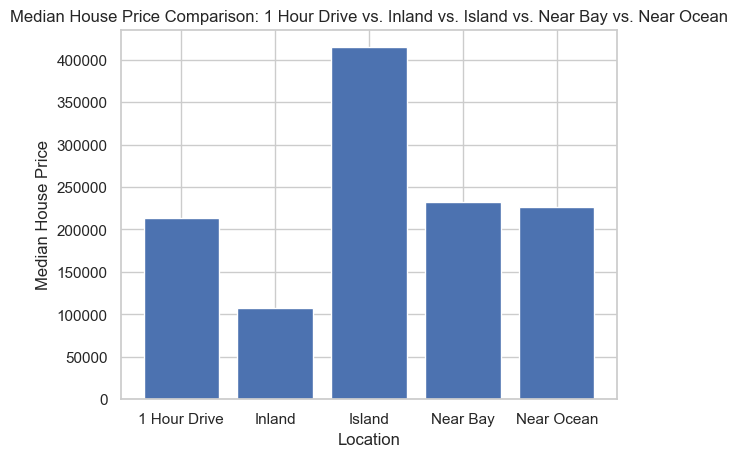

In [13]:
# Filter rows based on Ocean Proximity (inland or near bay or <1H OCEAN)
hour_drive = data[data['ocean_proximity_cat'] == 0]
inland = data[data['ocean_proximity_cat'] == 1]
island = data[data['ocean_proximity_cat'] == 2]
near_bay = data[data['ocean_proximity_cat'] == 3]
near_ocean = data[data['ocean_proximity_cat'] == 4]

# Calculate the median house prices for each group
median_price_hour_drive = hour_drive['median_house_value'].median()
median_price_inland = inland['median_house_value'].median()
median_price_island = island['median_house_value'].median()
median_price_near_bay = near_bay['median_house_value'].median()
median_price_near_ocean = near_ocean['median_house_value'].median()

# Visualize the results
plt.bar(['1 Hour Drive', 'Inland', 'Island', 'Near Bay', 'Near Ocean'], [median_price_hour_drive, median_price_inland, median_price_island, median_price_near_bay, median_price_near_ocean])
plt.xlabel('Location')
plt.ylabel('Median House Price')
plt.title('Median House Price Comparison: 1 Hour Drive vs. Inland vs. Island vs. Near Bay vs. Near Ocean')
plt.show()

## Question

How does the age of a house or building determine its price?

In [14]:
# Calculate the median house price for each age group
age_groups = data.groupby('housing_median_age')['median_house_value'].median().reset_index()

data['housing_median_age'].corr(data['median_house_value'])

0.10690275531308861

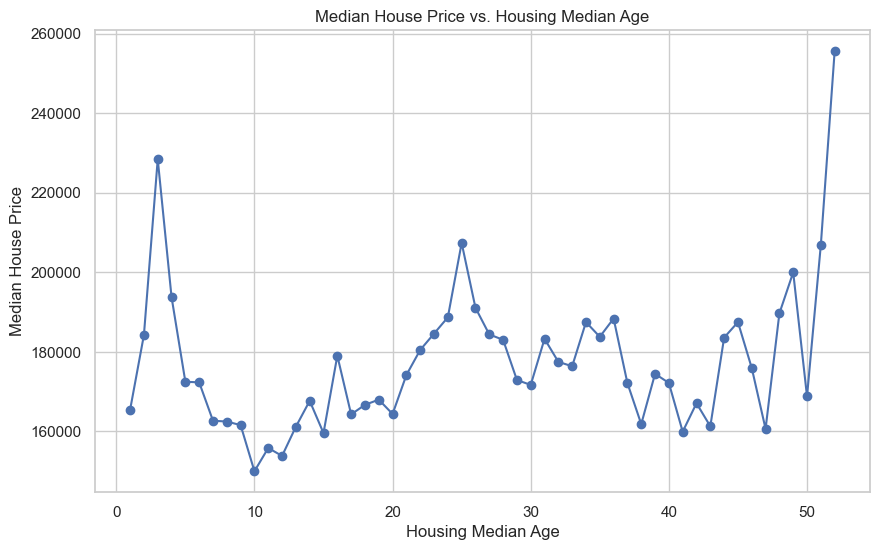

In [15]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(age_groups['housing_median_age'], age_groups['median_house_value'], marker='o')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Price')
plt.title('Median House Price vs. Housing Median Age')
plt.grid(True)
plt.show()

## Question

How does the median income of households in a block affect its median value?

In [16]:
# Calculate the median house value for each median income group
income_groups = data.groupby('median_income')['median_house_value'].median().reset_index()

data['median_income'].corr(data['median_house_value'])

0.6858107808010397

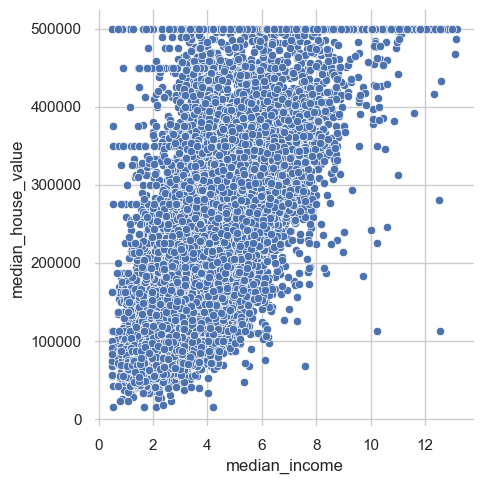

In [17]:
import seaborn as sns
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(data=data, x=data['median_income'], y=data['median_house_value'], sizes=(10, 20))
g.ax.xaxis.grid(True, "minor", linewidth=.5)
g.ax.yaxis.grid(True, "minor", linewidth=.5)
g.despine(left=True, bottom=True)

## Question

What is the distribution of housing prices in California?

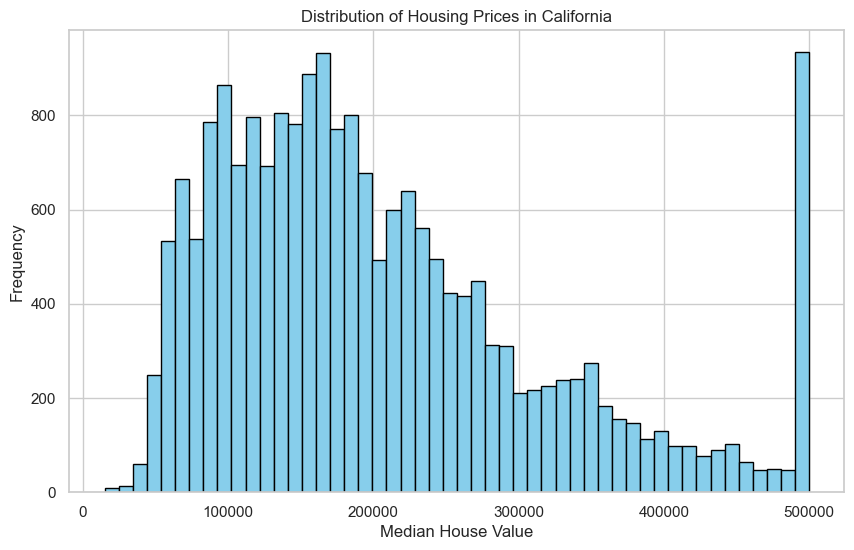

In [18]:
# Plot a histogram of housing prices
plt.figure(figsize=(10, 6))
plt.hist(data['median_house_value'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Housing Prices in California')
plt.grid(True)
plt.show()

## Question

How does housing price vary by location?

In [19]:
# <1H OCEAN = 0
# INLAND = 1
# ISLAND = 2
# NEAR BAY = 3
# NEAR OCEAN = 4

print(f"Median house price an hour drive to ocean: $ {median_price_hour_drive}")
print(f"Median house price inland: $ {median_price_inland}")
print(f"Median house price island: $ {median_price_island}")
print(f"Median house price near bay: $ {median_price_near_bay}")
print(f"Median house price near ocean: $ {median_price_near_ocean}")

Median house price an hour drive to ocean: $ 214100.0
Median house price inland: $ 107600.0
Median house price island: $ 414700.0
Median house price near bay: $ 232150.0
Median house price near ocean: $ 227000.0


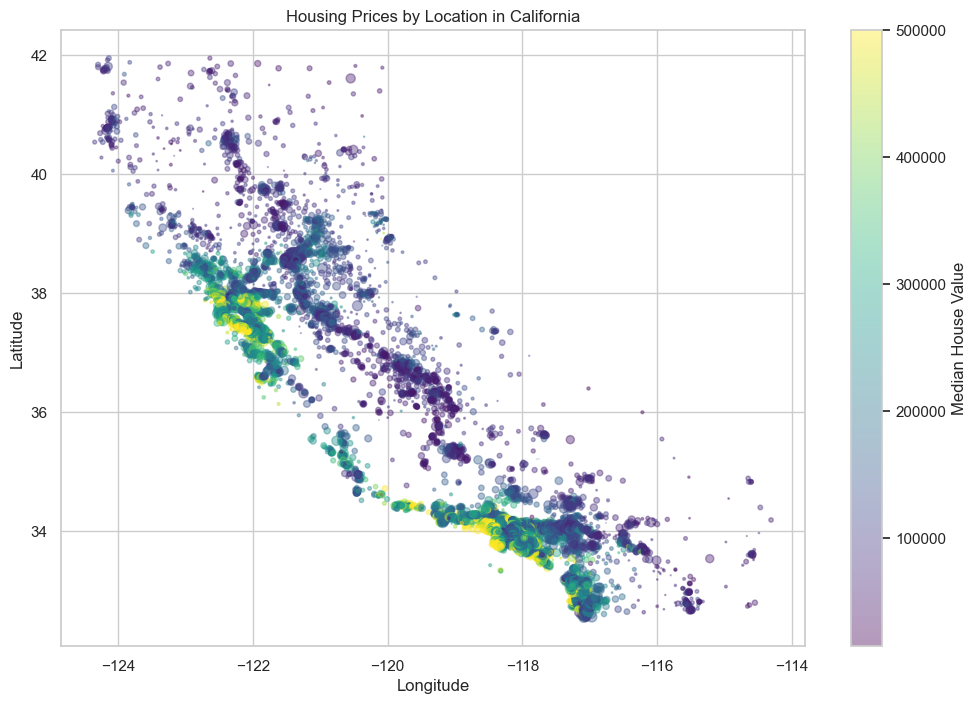

In [20]:
# Create a scatterplot of latitude and longitude with color-coded housing prices
plt.figure(figsize=(12, 8))
plt.scatter(data['longitude'], data['latitude'], c=data['median_house_value'], cmap='viridis', s=data['population']/100, alpha=0.4)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Housing Prices by Location in California')
plt.grid(True)
plt.show()

## Question

What features have the most significant impact on housing prices?

In [21]:
# Calculate correlations
correlations_data = data.iloc[1:,:-1]

correlations = correlations_data.corr()
price_correlations = correlations['median_house_value'].sort_values(ascending=False)

print("Top positively correlated features:")
print(price_correlations.head(5))

Top positively correlated features:
median_house_value    1.000000
median_income         0.685782
total_rooms           0.167024
housing_median_age    0.106951
households            0.077503
Name: median_house_value, dtype: float64


## Question

Are there any areas where housing is affordable yet has a high quality of life?

In [22]:
# YOUR_THRESHOLD should be set to your preferred minimum median income level to consider an area as "affordable."
# N is the number of areas you want to consider. You can adjust it based on your preferences.

# Filter areas where median income is above a certain threshold (affordable)
affordable_areas =  data[(data['median_income'] <= data['median_income'].std()) & (data['ocean_proximity_cat'] == 3) | (data['ocean_proximity_cat'] == 4)]
                

# Sort the affordable areas by median house value in ascending order
affordable_areas = affordable_areas.sort_values(by='median_house_value', ascending=True)

# Choose the top N areas as affordable with a good quality of life
affordable_areas

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_cat
14326,-117.16,32.71,52.0,845.0,451.0,1230.0,375.0,1.0918,22500.0,4
1791,-122.37,37.93,45.0,3150.0,756.0,1798.0,749.0,1.7500,37900.0,3
16672,-120.69,35.34,16.0,164.0,30.0,542.0,32.0,1.6563,42500.0,4
14821,-117.11,32.67,52.0,204.0,74.0,248.0,57.0,1.7961,47500.0,4
2593,-124.23,40.81,52.0,1112.0,209.0,544.0,172.0,3.3462,50800.0,4
...,...,...,...,...,...,...,...,...,...,...
8809,-118.41,33.75,4.0,311.0,51.0,128.0,46.0,9.8091,500001.0,4
8808,-118.39,33.71,18.0,1193.0,233.0,475.0,228.0,7.5594,500001.0,4
8807,-118.38,33.75,23.0,8277.0,1290.0,3176.0,1159.0,7.6986,500001.0,4
8816,-118.32,33.75,37.0,1080.0,135.0,366.0,142.0,11.6677,500001.0,4


In [23]:
import folium

avg_lat = data['latitude'].mean()
avg_lon = data['longitude'].mean()

area_map = folium.Map(location=[avg_lat, avg_lon], zoom_start=10, tiles='cartodb positron')

for idx, row in affordable_areas.iterrows():
#     color = '#ff0000'
    color = '#0000ff'
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6
    ).add_to(area_map)
    
area_map

## Question

Can we build a predictive model for housing prices?

### Predictive Model 1: OLS Regression

In [24]:
import statsmodels.formula.api as smf

model = smf.ols(formula = 'median_house_value ~ longitude + latitude + housing_median_age + total_rooms + total_bedrooms + population + households + median_income', data = data)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     4654.
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:30:55   Log-Likelihood:            -2.5082e+05
No. Observations:               20000   AIC:                         5.016e+05
Df Residuals:                   19991   BIC:                         5.017e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.385e+06   6.23

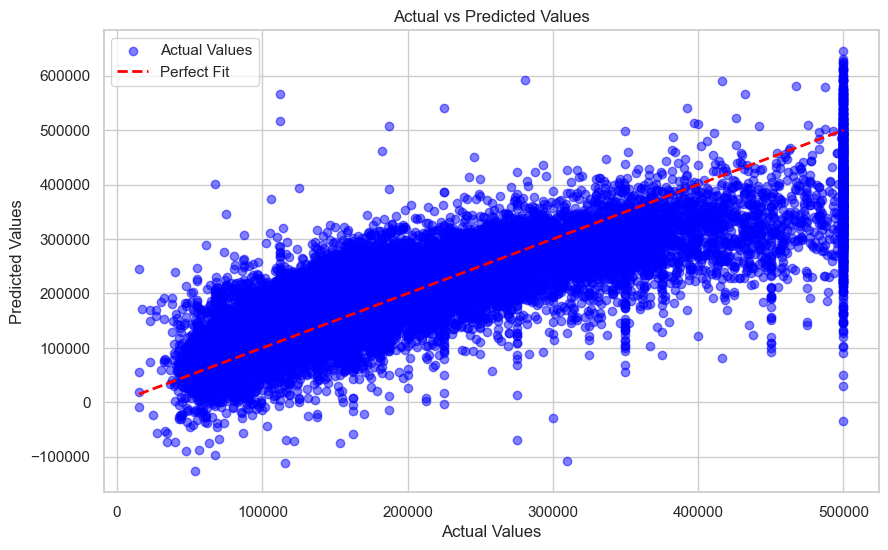

In [25]:
# Actual values are represented in blue, and a red dashed line indicates a perfect fit where actual values equal predicted values.

actual_values = data['median_house_value']
predicted_values = results.fittedvalues

# Create a scatter plot with different colors for actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, alpha=0.5, c='blue', label='Actual Values')
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], linestyle='--', color='red', linewidth=2, label='Perfect Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

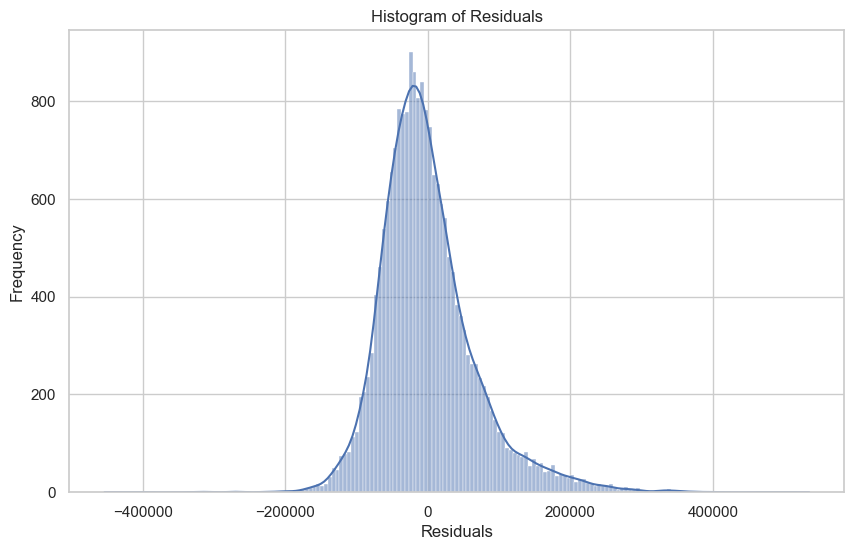

In [26]:
# Examines the distribution of residuals for normality.
# Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(results.resid, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

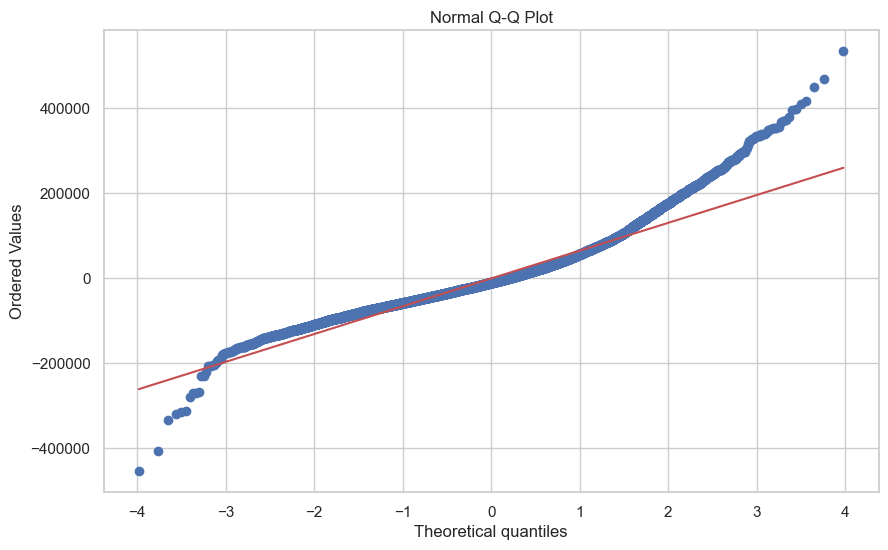

In [27]:
# QQ Plot (Normality of Residuals)
# Assesses whether residuals follow a normal distribution.
from scipy.stats import probplot
plt.figure(figsize=(10, 6))
probplot(results.resid, plot=plt)
plt.title('Normal Q-Q Plot')
plt.show()

### Predictive Model 2: Gradient Boosting Regressor

In [28]:
from sklearn.model_selection import train_test_split

data = pd.read_csv("housing.csv")

data = data.dropna()

X = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']]
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)

In [29]:
from sklearn.preprocessing import StandardScaler

class DataPreprocessing:
#     quantitative = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
    quantitative = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
    ssc = StandardScaler()
    
    def __init__(self, y=None): 
        """Main statistical characteristics of features"""
        self.q_25 = None
        self.medians = None
        self.q_75 = None
        self.means = None

    def fit(self, X:pd.DataFrame, y=None) -> None:
        """Initialization of the main statistical features. X: X_train"""
        self.q_25 = X[DataPreprocessing.quantitative].quantile(q=0.25)
        self.medians = X[DataPreprocessing.quantitative].quantile(q=0.5)
        self.q_75 = X[DataPreprocessing.quantitative].quantile(q=0.75)
        self.means = X[DataPreprocessing.quantitative].mean()
        
    def transform(self, X:pd.DataFrame, y=None):
        for column in X[DataPreprocessing.quantitative].columns:  # outliers processing
            q_3 = self.q_75[column]
            q_1 = self.q_25[column]
            iqr = q_3 - q_1
            upper_bound = q_3 + 1.5 * iqr
            lower_bound = q_1 - 1.5 * iqr
            X.loc[X[column] > upper_bound, column] = q_3
            X.loc[X[column] < lower_bound, column] = q_1
            
        for column in X[DataPreprocessing.quantitative].columns:  # pass processing
            X[column].fillna(self.means[column], inplace=True)
        
        # data transformation        
        X['population_per_room'] = X['population'] / X['total_rooms']  
        
        X['bedroom_share'] = X['total_bedrooms'] / X['total_rooms'] * 100  
  
        X['diag_coord'] = X['longitude'] + X['latitude']
    
        dummy = pd.get_dummies(X['ocean_proximity'])  
        X['_1H OCEAN'] = dummy['<1H OCEAN']
        X['INLAND'] = dummy['INLAND']
        X['ISLAND'] = dummy['ISLAND'] 
        X['NEAR BAY'] = dummy['NEAR BAY']
        X['NEAR OCEAN'] = dummy['NEAR OCEAN']
        X.drop(['ocean_proximity'],axis=1, inplace=True)
        
        X['age_cat'] = 0
        X.loc[X['housing_median_age'] <= 5, 'age_cat'] = 1  
        X.loc[(X['housing_median_age'] > 5) & (X['housing_median_age'] <= 10), 'age_cat'] = 2
        X.loc[(X['housing_median_age'] > 10) & (X['housing_median_age'] <= 25), 'age_cat'] = 3
        X.loc[X['housing_median_age'] > 25, 'age_cat'] = 4
        
    def scaling(X:pd.DataFrame, data_type: str, y=None) -> pd.DataFrame:
        """Scaling (Data standardization) for linear models.
        ssc = StandardScaler(), ssc was define as a class argument"""
        if data_type.lower() == 'train':
            return pd.DataFrame(DataPreprocessing.ssc.fit_transform(X), columns=X.columns, index=X.index)
        if data_type.lower() == 'test':
            return pd.DataFrame(DataPreprocessing.ssc.transform(X), columns=X.columns, index=X.index)


preprocessing = DataPreprocessing()
preprocessing.fit(X)
preprocessing.transform(X_train)
preprocessing.transform(X_test)

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_train = gbr.predict(X_train)
y_pred_test = gbr.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("The r-square value is: {:.4f}".format(r2_train))

The r-square value is: 0.8086


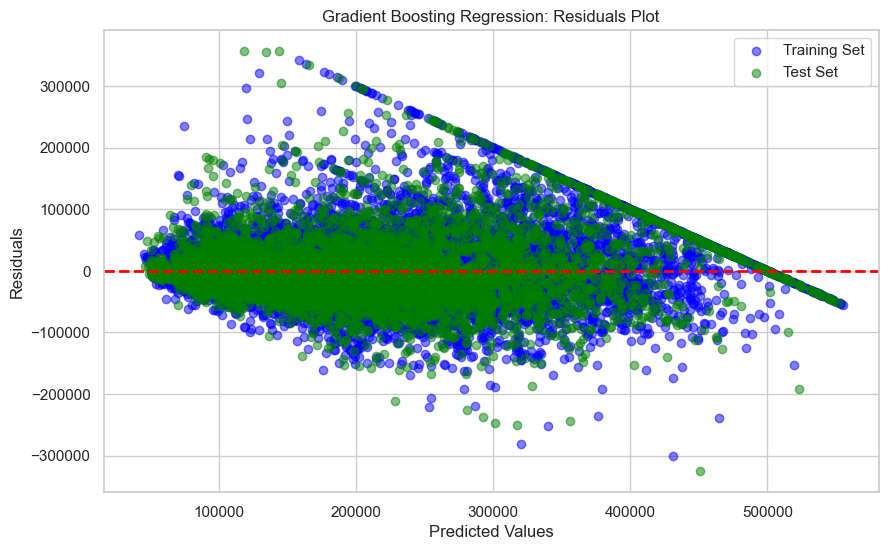

In [31]:
# Residuals Plot
# Visualize the distribution of residuals to assess the model's performance and identify any patterns or outliers.
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train, residuals_train, color='blue', alpha=0.5, label='Training Set')
plt.scatter(y_pred_test, residuals_test, color='green', alpha=0.5, label='Test Set')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Gradient Boosting Regression: Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

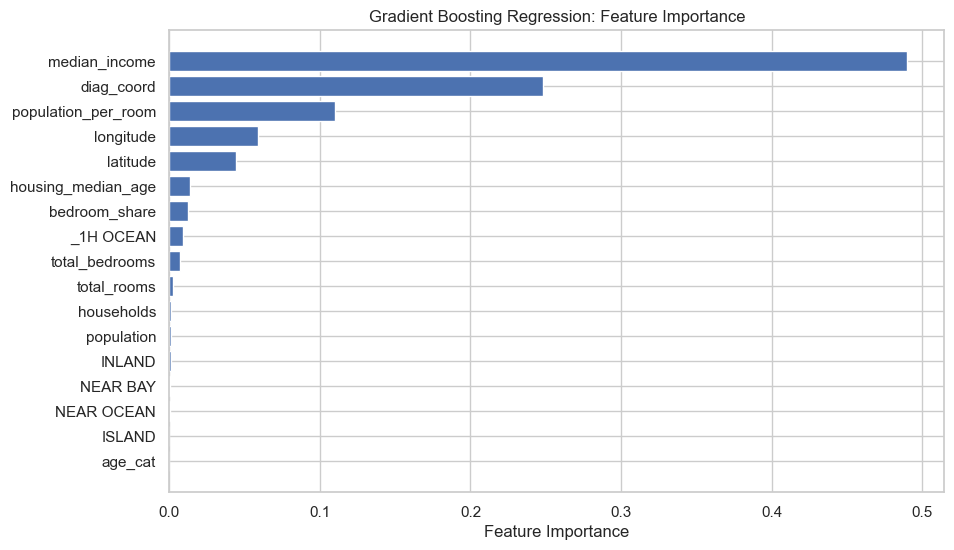

In [32]:
# Feature Importance Plot
# Understand the importance of different features in making predictions.

import numpy as np

feature_importance = gbr.feature_importances_
feature_names = X_train.columns

indices = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), feature_importance[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title('Gradient Boosting Regression: Feature Importance')
plt.xlabel('Feature Importance')
plt.show()